In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn import model_selection
from sklearn.decomposition import PCA

from imblearn.under_sampling import CondensedNearestNeighbour

plt.rcParams['axes.facecolor'] = 'white'

In [19]:
pokemons = pd.read_csv("Pokemon.csv")
print(len(pokemons))

800


In [21]:
pokemons = pokemons.drop(['#'], 1)

In [4]:
pokemons.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokemons = pokemons.drop(['Name'], 1)

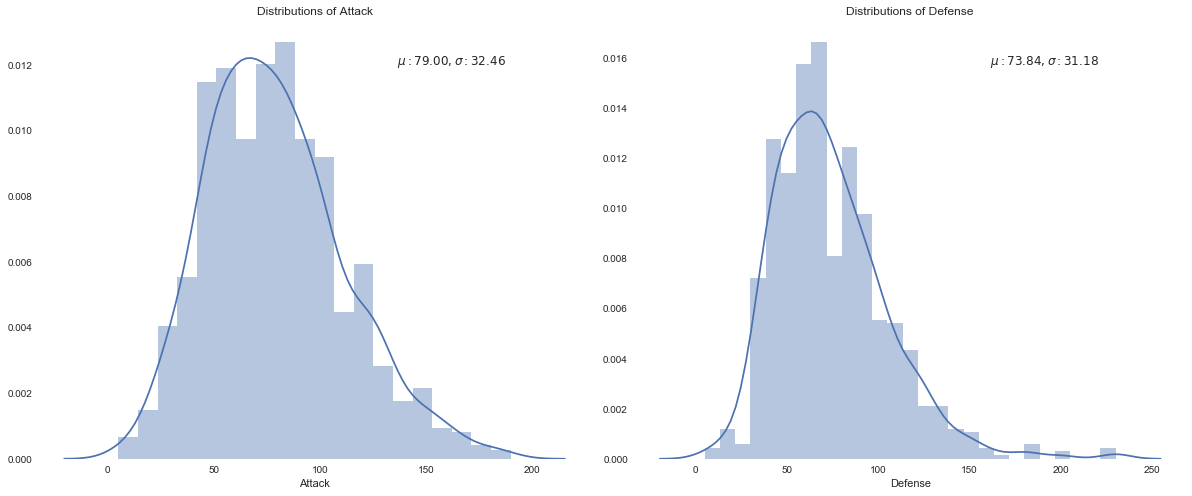

In [6]:
stats = pokemons[['Attack', 'Defense']]
plt.figure(figsize=(25, 20))

for ii, stat in enumerate(stats):
    title = "Distributions of {stat}".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    sns.distplot(pokemons[stat])
    x = plt.gca().get_xlim()[1] * .6
    y = plt.gca().get_ylim()[1] * .9
    plt.text(x, y, '$\mu: {mu: .2f}, \sigma: {sigma: .2f}$'.format(mu = pokemons[stat].mean(), sigma=pokemons[stat].std()))
    
    
plt.tight_layout()
plt.show()

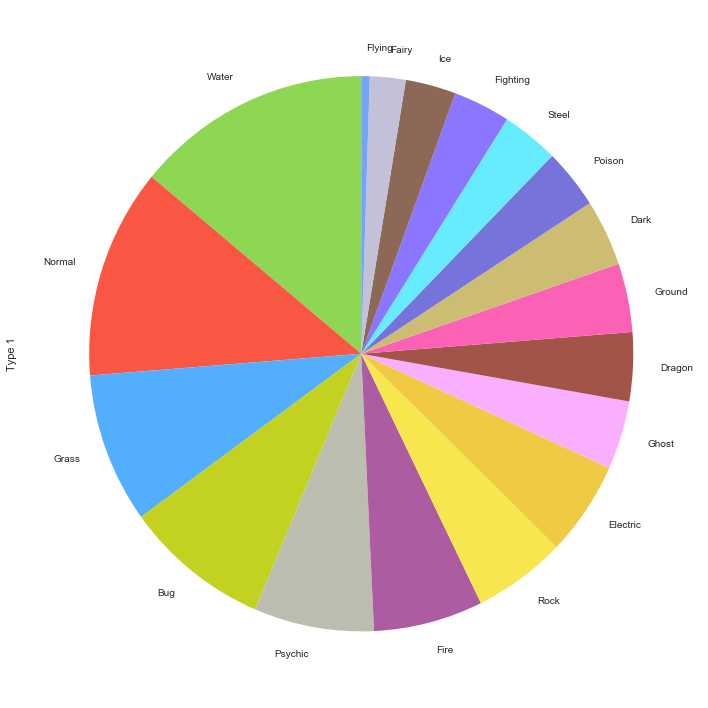

In [7]:
types = pokemons['Type 1']
colors = ["#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"]

types.value_counts().plot.pie(
    colors=colors,
    startangle=90,
    figsize=(10, 10)
)
plt.tight_layout()

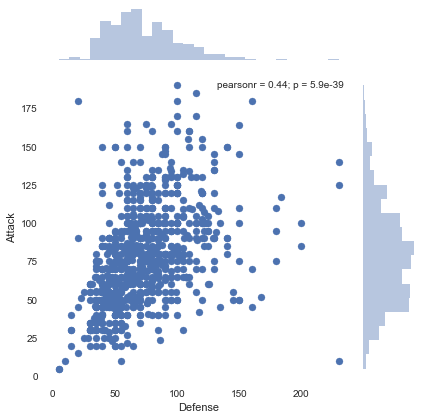

In [8]:
sns.jointplot(x="Defense", y="Attack", data=pokemons)

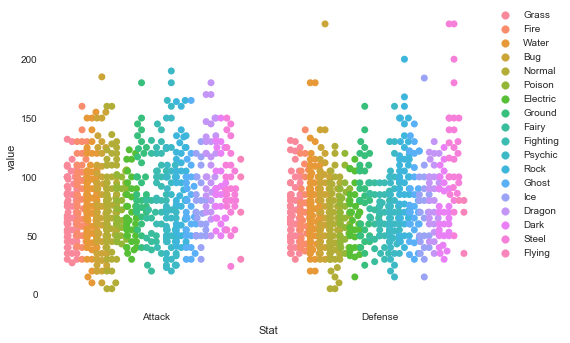

In [9]:
pkmn1 = pokemons[[ "Type 1", "Type 2", 'Attack', 'Defense']]
pkmn = pd.melt(pkmn1, id_vars=["Type 1", "Type 2"], var_name="Stat")
sns.swarmplot(x="Stat", y="value", data=pkmn, hue="Type 1", split=True, size=7)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

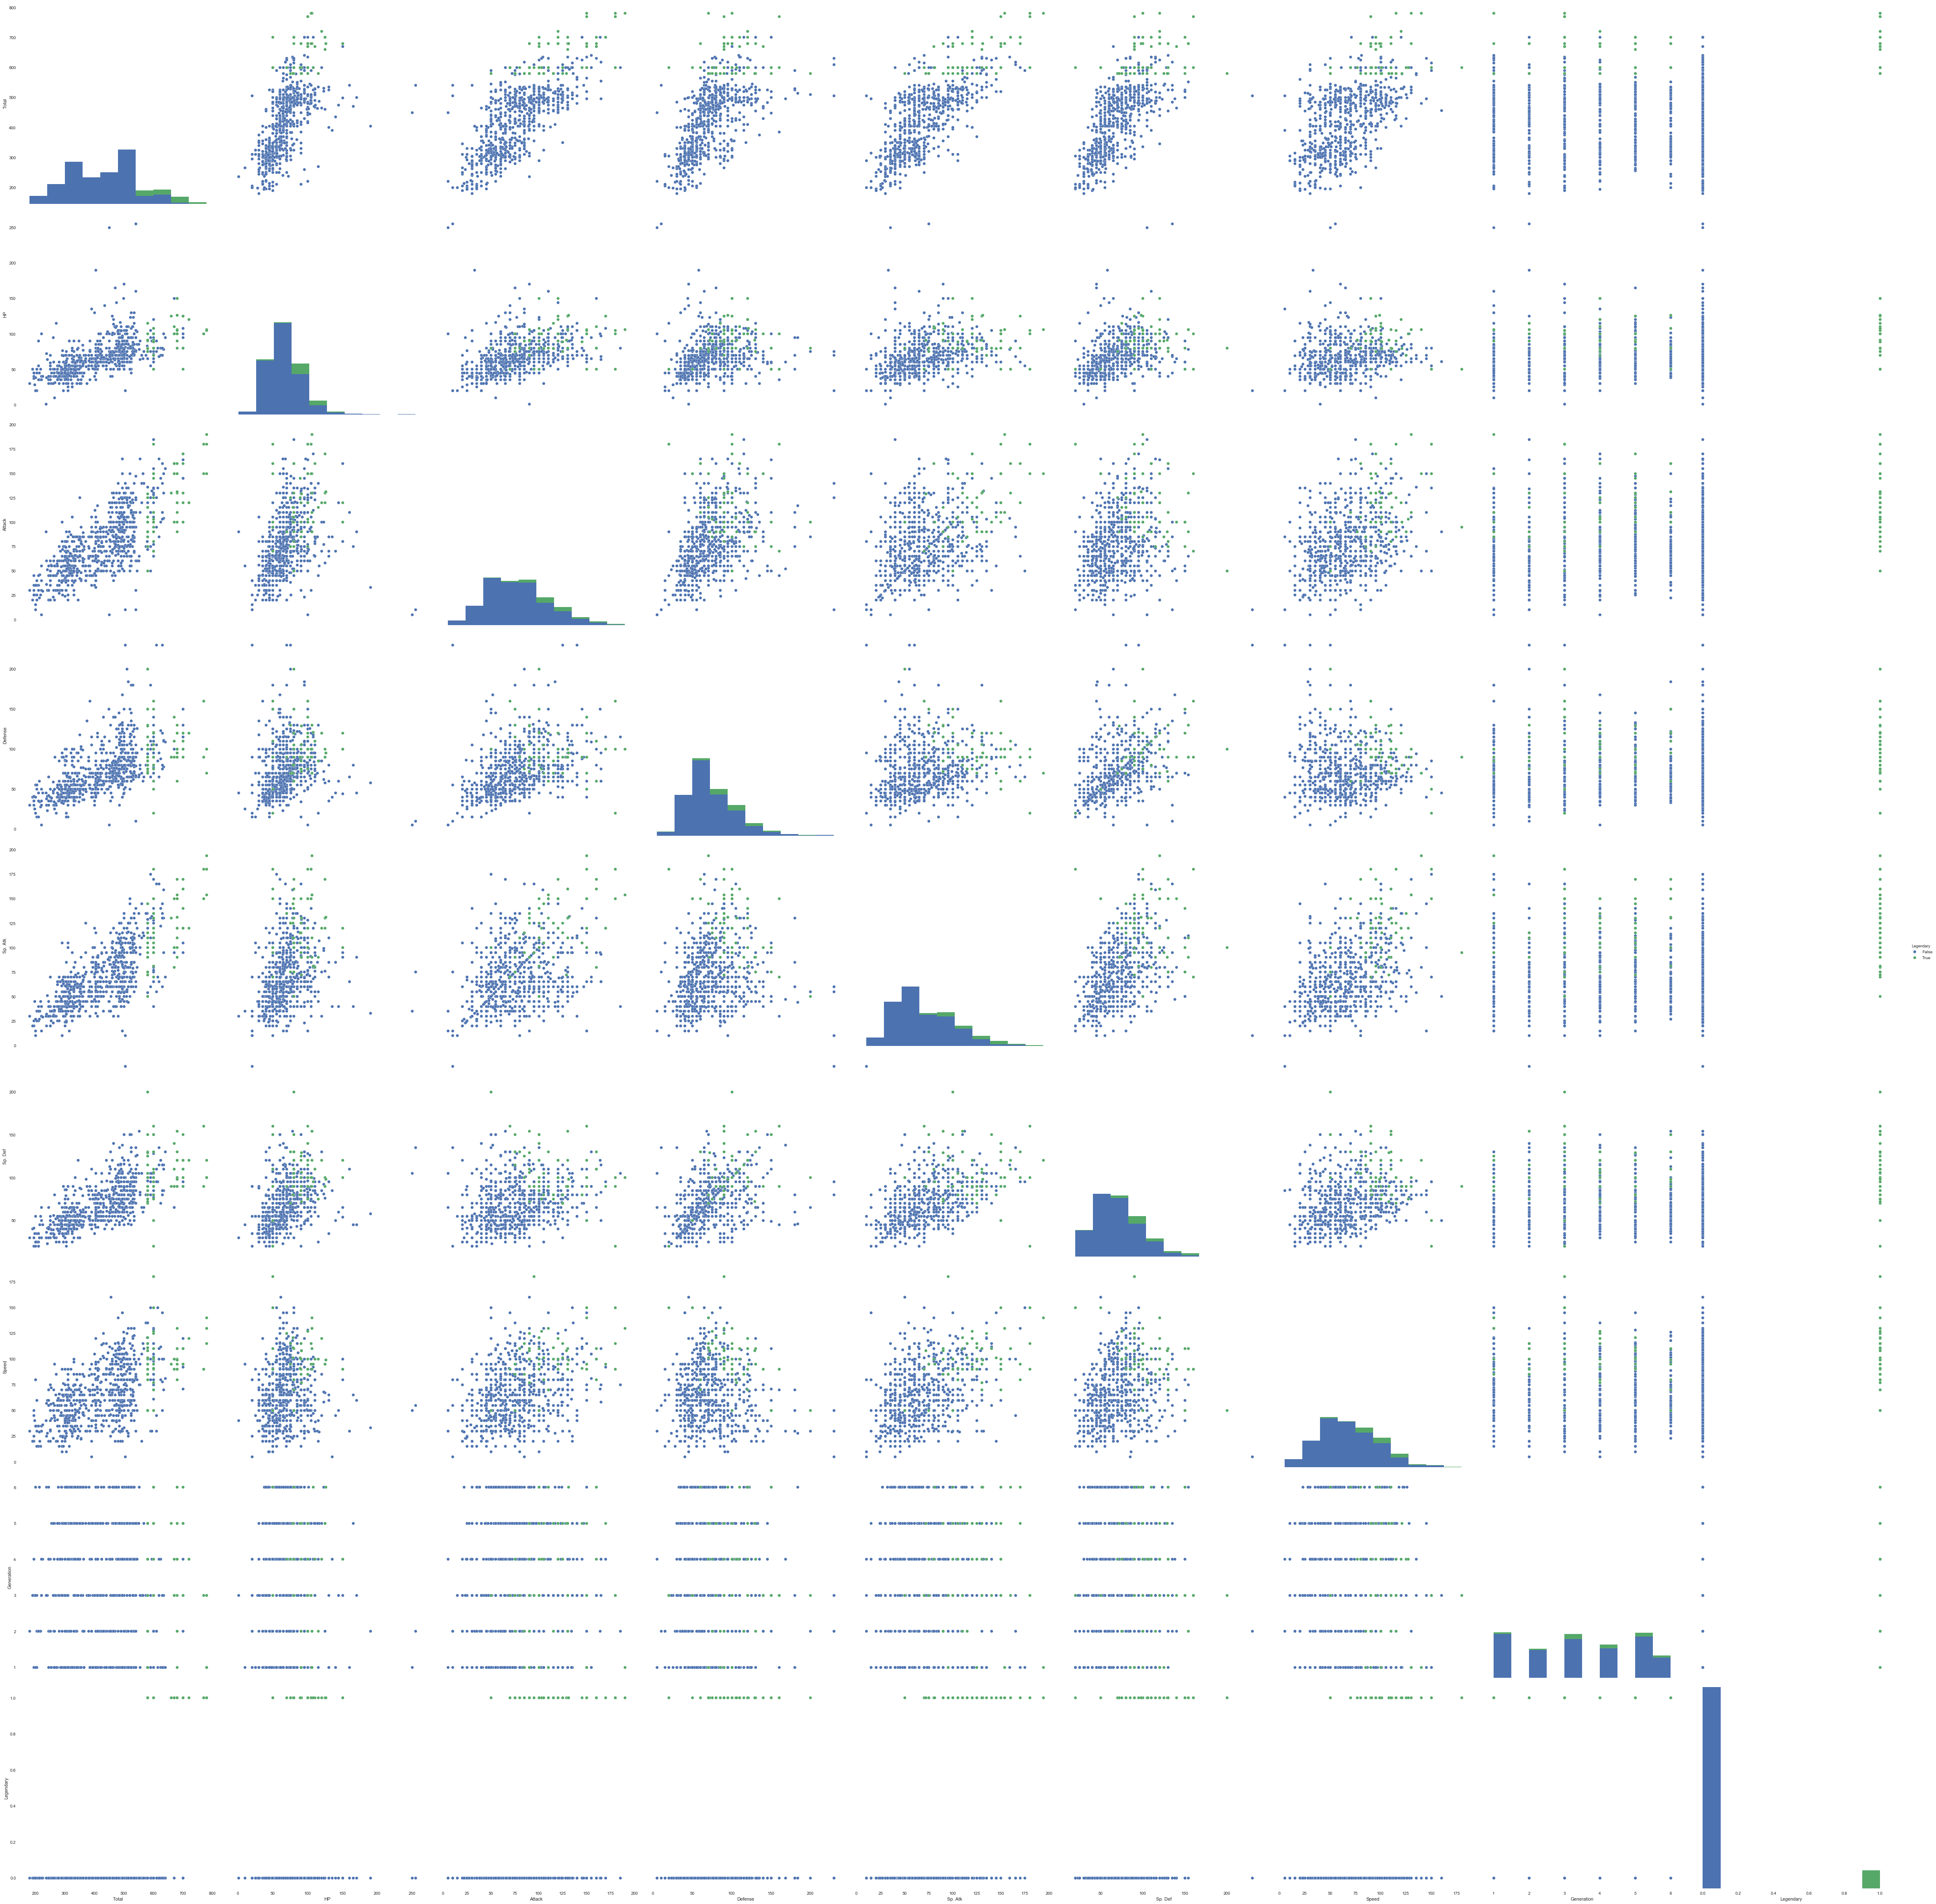

In [10]:
sns.pairplot(pokemons, hue="Legendary", size=7)

[False True]
735
65


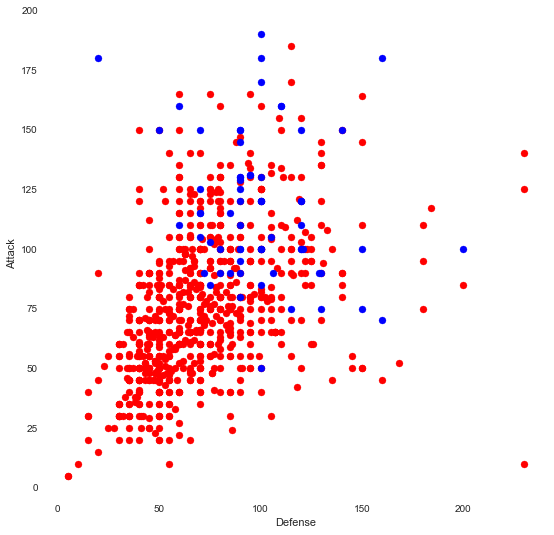

In [11]:
y = 'Attack'
x = 'Defense'
pokemons_a_d = pokemons[[x, y]]
y_field = 'Legendary'
types = pokemons[y_field].unique()
print(types)

plt.figure(figsize=(9, 9))
my_list = []
colors=('r', 'b')
for i, t in enumerate(types):
    print(len(pokemons[pokemons[y_field] == t]))
    m = pokemons_a_d[pokemons[y_field] == t]
    my_list.append(m)
    plt.scatter(m[[0]], m[[1]], c=colors[i])

plt.ylabel('Attack')
plt.xlabel('Defense')


/Users/catherine/.virtualEnvs/ML17/lib/python3.4/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


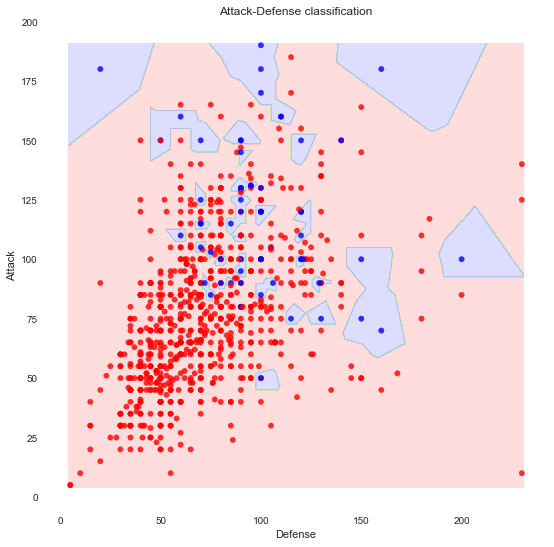

In [12]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

pokemons_a_d = pokemons[['Defense', 'Attack', 'Legendary']]

X = pokemons_a_d.ix[:, pokemons_a_d.columns != 'Legendary'].as_matrix()
y = pokemons_a_d[['Legendary']]

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

not_legendary = pokemons_a_d[pokemons['Legendary'] == 0]
legendary = pokemons_a_d[pokemons['Legendary'] == 1]


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.4),
                     np.arange(y_min, y_max, 0.4))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(9, 9))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap=cmap_bold, s=30)
plt.title("Attack-Defense classification")
plt.ylabel('Attack')
plt.xlabel('Defense')


In [13]:
X = pokemons.ix[:, pokemons.columns != 'Legendary']
y = pokemons[['Legendary']]

In [14]:
X = X.drop(['Type 1', 'Type 2'], 1)

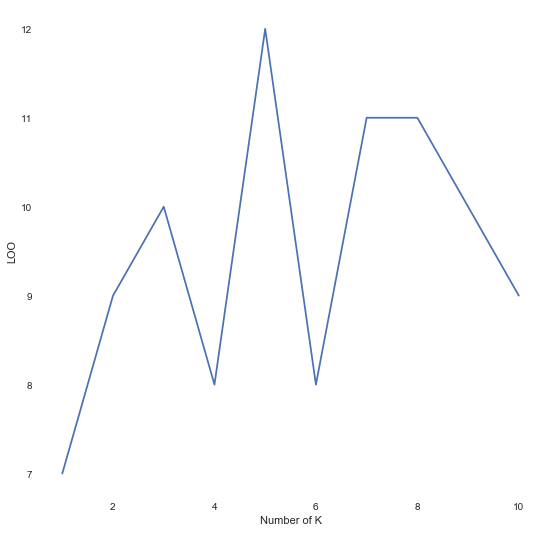

In [15]:
precisions = []
recalls = []
fs = []

y = np.asarray(y).ravel()
X_train, X_test, y_train, y_test =model_selection.train_test_split(
     X, y, test_size=0.3, random_state=42)

failed = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)

    a = y_test == predicted
    failed.append(len(a) - np.sum(a))
    
plt.figure(figsize=(9,9))

plt.plot(np.arange(1, 11), failed)
plt.ylabel('LOO')
plt.xlabel('Number of K')


In [16]:
# from sklearn.model_selection import cross_val_score, LeaveOneOut
    
# scores = cross_val_score(model, X, np.asarray(y).ravel(), cv = 2)
# print (scores)


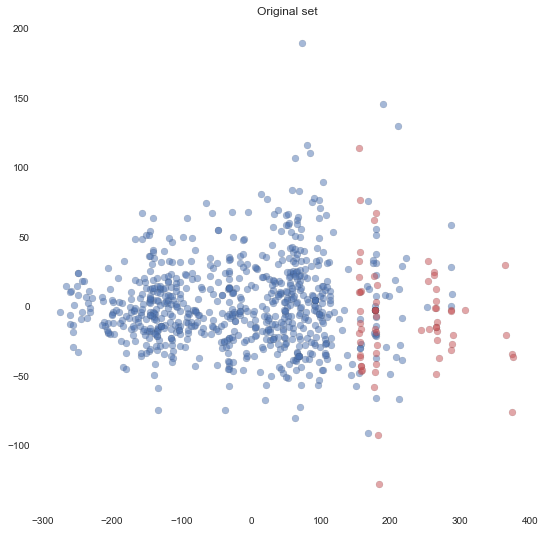

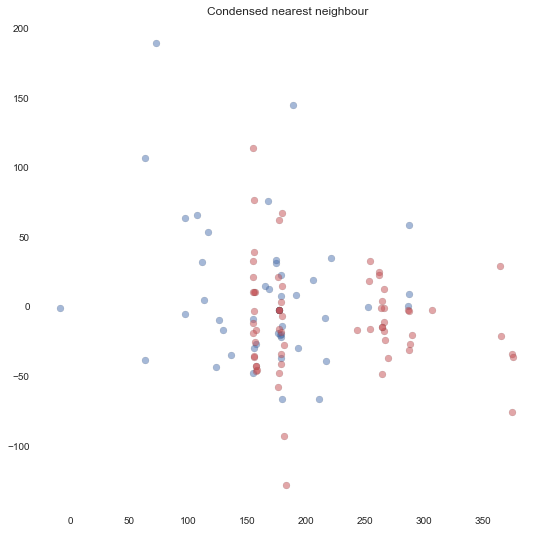

In [17]:

almost_black = '#262626'
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply Condensed Nearest Neighbours
cnn = CondensedNearestNeighbour()
X_resampled, y_resampled = cnn.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)
palette = sns.color_palette()

plt.figure(figsize=(9,9))
plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
plt.title('Original set')
plt.show()
plt.figure(figsize=(9,9))
plt.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5, edgecolor=almost_black,
            facecolor=palette[0], linewidth=0.15)
plt.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5, edgecolor=almost_black,
            facecolor=palette[2], linewidth=0.15)
plt.title('Condensed nearest neighbour')

plt.show()

In [28]:
pokemons[pokemons['Name'].isin(['Bulbasaur', 'Mewtwo', 'Volcanion', 'Ekans', 'Nidorina', 'Rattata', 
                               'Sandshrew', 'Articuno'])]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
24,Rattata,Normal,NaN,253,30,56,35,25,35,72,1,False
28,Ekans,Poison,NaN,288,35,60,44,40,54,55,1,False
32,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False
35,Nidorina,Poison,NaN,365,70,62,67,55,55,56,1,False
156,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
162,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
799,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True
